In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

In [3]:
def ruta_instancia(instancia):
    return 'instancias/%s.txt' % instancia

# Creo el archivo que con los puntos de la $instancia y los parámetros del algoritmo
def crear_instancia(instancia, algoritmo, profundidad, sigmaT, ft, podas_a_aplicar):
    file_name = 'instancias/corridas/%s_%s_%s_%s_%s_%s.txt' % (instancia, algoritmo, profundidad, sigmaT, ft, podas_a_aplicar)
    output_file = open(file_name, 'w')
    output_file.write(algoritmo + '\n')

    output_file.write(str(profundidad) + '\n')
    output_file.write(str(sigmaT) + '\n')
    output_file.write(str(ft) + '\n')
    output_file.write(str(podas_a_aplicar) + '\n')

    #output_file.write(str(poda) + '\n')
        
    archivo_instancia = open(ruta_instancia(instancia), 'r')
    output_file.writelines(archivo_instancia.readlines())
    archivo_instancia.close()
    
    output_file.close()
    return file_name

In [4]:
# Creo un DataFrame con la instancia pedida
def cargar_informacion(nombre_instancia):
    matrix_data = []
    archivo_instancia = open(ruta_instancia(nombre_instancia), 'rb')
    size = int(archivo_instancia.readline())
    
    indice = 1
    lineas = archivo_instancia.readlines()
    for linea in lineas:
        lista = linea.split()
        x = int(lista[0])
        y = int(lista[1])
        matrix_data.append([indice,x,y, nombre_instancia])
        indice = indice + 1
    archivo_instancia.close()
    
    return pd.DataFrame(matrix_data, columns=['numero_punto','x', 'y','instancia'])

In [16]:
# Corro el $algoritmo (ejecutable) para el input del $archivo
def correr_instancia(archivo, algoritmo):
    archivo = open(archivo, 'rb')
    input_data = archivo.read()
    archivo.close()
    result = subprocess.run(["../../bin/%s" % algoritmo], stdout=subprocess.PIPE, input=input_data)
    clusters = result.stdout.decode("utf-8").split('\n')
    clusters.pop(len(clusters) -1)
    return (int(clusters[0]) / 100000)

def lista_de(lista,tipo):
    return list(map(lambda valor : tipo(valor),lista))

In [19]:
# Englobo todas las funciones y devuelvo un DataFrame con la instancia y los clusters calculados
def promedio_en_milis(instancia, algoritmo, profundidad, sigmaT, ft, cantidad, podas_a_aplicar = 'ambas'):
    tiempos = [] 
    file_name = crear_instancia(instancia,algoritmo,profundidad,sigmaT,ft,podas_a_aplicar)
    data_frame = cargar_informacion(instancia)
    for iteracion in range(0,cantidad):
        tiempos.append(correr_instancia(file_name, 'ejercicio_1_main_time'))
        
    promedio = 0
    for tiempo in tiempos:
        promedio += tiempo
    promedio = promedio / len(tiempos)
    return promedio

In [33]:
def graficar(instancia, iteraciones, colorsito = 'green'):
    prim_time = promedio_en_milis(instancia ,'prim',3,1.5,1.5, iteraciones)
    kruskal_time = promedio_en_milis(instancia ,'kruskal',3,1.5,1.5, iteraciones)
    kruskal_compressed_time = promedio_en_milis(instancia ,'kruskal-compressed',3,1.5,1.5, iteraciones)

    x = ['Prim', 'Kruskal', 'Kruskal Compressed']
    times = [prim_time,kruskal_time,kruskal_compressed_time]

    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, times, color=colorsito)
    plt.xlabel("Algoritmo elegido")
    plt.ylabel("Tiempo en milisegundos")
    plt.title("Comparando tiempos entre los tres algoritmos")

    plt.xticks(x_pos, x)

    plt.show()

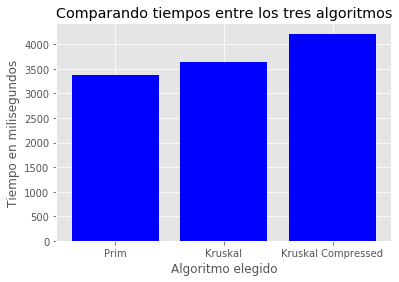

In [34]:
graficar('DIM-2', 10, 'blue')

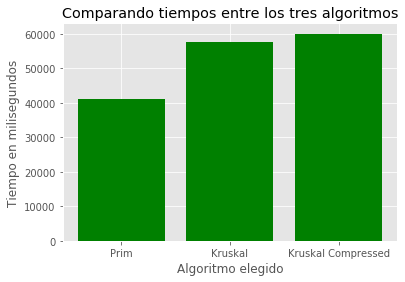

In [30]:
graficar('instancia-1', 10)

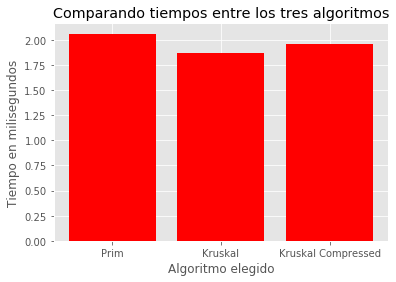

In [35]:
graficar('ejemplo-10', 10,'red')